# Predicting Patient Outcomes in Liver Cirrhosis Using Machine Learning: Phase 2
**Author:**

    - **Zain Abbas (4031481)**
    - **Kaivalya Pulekar (4074576)**

**Institution:** RMIT University   
**Date:** May 2025

## Importing necessary Libraries
To initiate the analysis, we begin by importing a set of libraries that provide essential functionality for data manipulation, visualization, preprocessing, and statistical analysis:

- **os** – File and directory operations  
- **random** – Random number generation  
- **numpy** – Numerical computing and arrays  
- **pandas** – Data manipulation and analysis  
- **tensorflow** – Deep learning framework  
- **matplotlib.pyplot** – Basic plotting  
- **seaborn** – Statistical data visualization  
- **logging** – Manage output and suppress logs  
- **scipy.stats** – Statistical tests  
- **itertools** – Combinatorics and iteration tools  
- **sklearn.preprocessing** – Feature scaling and encoding  
- **sklearn.feature_selection** – Feature selection techniques  
- **sklearn.model_selection** – Data splitting and model tuning  
- **sklearn.linear_model** – Logistic regression  
- **sklearn.metrics** – Model evaluation  
- **sklearn.tree** – Decision tree classifier  
- **sklearn.ensemble** – Random forest classifier  
- **tensorflow.keras** – Neural network building blocks  
- **xgboost** – Gradient boosting classifier  

In [119]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as mtb
import seaborn as sns
import logging
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_rel
from itertools import combinations

from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.feature_selection import f_classif,SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.optimizers import Adam

from xgboost import XGBClassifier

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
%matplotlib inline

# Table of Contents
1. [Introduction](#introduction)
    - [Phase 1 Summary](#phase-1-summary)
    - [Report Overview](#report-overview)
    - [Overview of Methodology](#overview-of-methodology)
2. [Predictive Modelling](#predictive-modelling)
    - [Feature Selection](#feature-selection)
    - [Model Fitting & Tuning](#model-fitting--tuning)
    - [Neural Network Model Fitting & Tuning (Advanced)](#neural-network-model-fitting--tuning-advanced)
    - [Model Comparison](#model-comparison)
3. [Critique & Limitations](#critique-limitations)
4. [Summary & Conclusions](#summary-conclusions)
    - [Project Summary](#project-summary)
    - [Summary of Findings](#summary-of-findings)
    - [Conclusions](#conclusions)
5. [References](#references)

## Introduction

### Phase 1 Summary

**Feedback incorporation:**

Feedback for phase 1 was successfully incorporated and so there have been changes done in the phase 1 file described briefly below:

| Change Type            | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **Title Renaming**     | Added a relevant title to project as 'Predicting Patient Outcomes in Liver Cirrhosis Using Machine Learning. |
| **Structural Cleanup** | Re-structured the report according to phase 1 instructions and feedback. Some sections were added or removed. |
| **Markdown Updates**   |Section headers were added and explanation was improvised as per feedback and instructions.     |
| **Code Tidying**       | Removed one-hot encoding, feature scaling and selection as per feedback. Added code to print 10 obervations |
| **Missing Value Imputation**   | Missing values imputation improved with additional information from the data source. |
| **Target Variable** | Target variable changed as EDA results did not give sufficient support for drug classification (early approach) |
| **Visualization** | Changes done in visualization section to conform with target variable changes and feedback instructions. |

**Summary:**

The initial phase of the project focused on preparing a clean and structured dataset suitable for predictive modelling using machine learning. The dataset, derived from a clinical study on liver cirrhosis patients, was carefully examined to identify and address missing values, inconsistencies, and irrelevant features. Appropriate imputation techniques were applied for both numerical and categorical variables to ensure data quality and completeness.

Following the cleaning process, exploratory data analysis (EDA) was conducted to understand the distribution and relationships among variables. Univariate and bivariate visualizations revealed key insights into how clinical features such as bilirubin levels, platelet count, and ascites were associated with patient outcomes. This informed the design of feature selection and modelling strategies for the next phase. In addition to this, it also helped to take big decisions and do breaking changes in the project such as changing the target variable from 'Drug' to 'Status' which in effect changed the entire approach towards the project.

Additionally, a comprehensive literature review was undertaken to identify effective machine learning algorithms commonly applied in similar healthcare contexts. The insights gathered from Phase 1 laid a strong foundation for Phase 2 by clearly defining the modelling objectives, selecting appropriate algorithms (Logistic Regression, Decision Trees, Random Forest, XGBoost, and Neural Networks), and preparing a scalable pipeline for training and evaluation. Overall, Phase 1 ensured that all necessary preprocessing and planning were in place to support accurate and meaningful predictive modelling in the second phase.


### Report Overview

This report presents the second phase of our machine learning project, focusing on predictive modelling using the Cirrhosis dataset. It begins with an overview of the methodology followed by a detailed implementation of feature selection and scaling techniques. Subsequently, we apply four supervised learning algorithms. Each algorithm undergoes hyperparameter tuning to optimise its performance. In addition to this we also shed some light upon how we can efficiently make use of neural network modelling approach for predictive modelling.

The report includes graphical visualisations of model tuning results, comparative performance metrics, and statistical significance tests using paired t-tests. We conclude with a critique of our modelling approach and a comprehensive summary of key findings, limitations, and recommendations.


### Overview of Methodology

Our predictive modelling methodology followed a systematic machine learning pipeline, starting from data encoding and ending in final model evaluation. The key stages are as follows:

1. **Target Definition:** 
A binary classification variable named Survival was derived from the Status column. Patients labeled "C" or "CL" were marked as survived (1), and others as not (0).

2. **Data Encoding:**
    - One-Hot Encoding was used to transform nominal categorical variables (Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema) for algorithms sensitive to non-numeric input (e.g., Logistic Regression, Neural Network).
    - Ordinal Encoding was applied for models that benefit from categorical integer representation (e.g., Decision Trees, Random Forests, XGBoost).

3. **Feature Selection:** Two statistical methods were used to assess feature relevance:
    - f_classif (ANOVA F-test) for numeric predictors
    - chi2 (Chi-square test) for categorical features

Features with p-values < 0.05 were retained for modelling.

4. **Feature Scaling:**
Features were standardised using StandardScaler() to ensure equal weighting, especially important for algorithms that rely on distance calculations or gradient-based optimisations (e.g., Logistic Regression and Neural Network).

5. **Data Splitting:**
The dataset was stratified and split into training (70%), development (15%), and test (15%) sets. This enabled fair model validation and performance testing.

6. **Model Implementation:**
    Five machine learning models were developed:
    - Logistic Regression
    - Decision Tree
    - Random Forest
    - XGBoost
    - Neural Network (feedforward with one hidden layer)

7. A **unified model_builder** function was used to perform:
    - Model training
    - Manual hyperparameter tuning
    - Validation-based model selection
    - Accuracy vs. tuning visualisation
    - Final testing with classification report and ROC-AUC

8. **Model Evaluation:** 
    - Models were evaluated using accuracy, precision, recall, F1-score, and ROC-AUC. 
    - A paired t-test was conducted on squared errors to compare performance statistically.

## Predictive Modelling

Before starting to apply modelling techniques and data preparation phases, we have loaded the dataset that was updated after data pre-processing and exploration processes conducted in Phase 1 [1]. After all those processes in phase 1, now we have data with 312 observations and 19 variables including target variable. After that we create a new binary variable 'Survival' that denotes survival status of patients derived from patient 'Status' after clinical trial and consists of 2 categories:
1. 1 -- For patients with 'Status' C or CL (were alive at the end of clinical trial or censored due to liver tx).
2. 0 -- For patients with 'Status' D.

This was done to reduce class imbalance that may effect modelling as patients with 'CL' value were very low in clinical trial (6%). Now, 'Survival' variable will serve as our target variable.

In [120]:
cirihosis_data = pd.read_csv("cirihosis_updated.csv")
print(cirihosis_data.shape)
cirihosis_data.head(10)

(312, 19)


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.000000,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.000000,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.000000,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.000000,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.000000,10.9,3.0
5,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,251.640899,11.0,3.0
6,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.000000,9.7,3.0
7,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.000000,11.0,3.0
8,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.000000,11.0,2.0
9,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.000000,11.5,4.0


In [121]:
cirihosis_data["Survival"] = cirihosis_data["Status"].apply(lambda x: 1 if x == "C" or x=="CL" else 0)
print(cirihosis_data.dtypes)

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Survival           int64
dtype: object


### Feature Selection

The data preparation steps are very important to achieve the correctly structured data that is appropriate for model fitting. This step is also important as different model types have different data requirements for appropriate prediction results. Hence, before model building and fine tuning we need to ensure our data is prepared with the following steps:
1. Encoding of categorical variables. (if required)
2. Splitting the data into train, dev (validation) and test set in ratio of 70:15:15.
3. Feature selection using hypothesis tests. (if required)
4. Feature scaling using StandardScalar (if required)

#### a. One Hot Encoding/ Label Encoding:

Before applying feature selection, we conducted one-hot encoding and label encoding for categorical variables wherever appropriate. For instance, all the nominal variables were one-hot encoded, ordinal variables were label encoded. It helps logistic regression models to identify and process categorical variables accurately.

#### b. Feature Selection:

To reduce model complexity and retain only the most informative predictors, we applied statistical feature selection techniques on both numerical and categorical variables using the training dataset.

- Numerical Features were evaluated using the ANOVA F-test (f_classif), which measures how well each feature separates the target classes (Survival).
- Categorical Features were assessed using the Chi-squared (chi2) test, which evaluates independence between each categorical feature and the survival outcome.

The feature selection process revealed several strong predictors of patient survival. Among numerical variables, Bilirubin, Prothrombin, and N_Days showed the highest statistical relevance, with p-values in the range of 1e-9 to 1e-12. This indicates these biomarkers are highly associated with survival outcomes.

For categorical variables, Ascites_Y, Edema_Y, and Hepatomegaly_Y had strong chi-squared scores, suggesting the presence of these conditions is significantly related to lower survival rates. Features like Drug_Placebo and Sex_M, with p-values above 0.05, were not retained due to their limited predictive power.


**Note:** *Features with p-values < 0.05 were considered statistically significant and were retained for model training. Feature selection, encoding and scaling was applied only on linear models like Logistic regression and Neural Networks as the other non-linear models (Decision Trees, Random Forest, XGB) have built-in feature selection properties, handling of variables on different scales and categories.*

**Top Selected Features ( from output )**

**1. Numerical Features (p < 0.05):**
- Bilirubin (p ≈ 4.74e-12)
- Prothrombin
- N_Days
- Copper
- SGOT
- Albumin
- Alk_Phos
- Age
- Triglycerides
- Cholesterol

**2. Categorical Features (p < 0.05):**
- Ascites_Y
- Edema_Y
- Hepatomegaly_Y
- Spiders_Y
- Stage
- Edema_S




In [122]:
#Feature Encoding
def encoding(data):
    #one hot encode nominal variables
    data = pd.get_dummies(cirihosis_data, columns=["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"], drop_first=True)
    return data

In [123]:
#Label Encoding
def label_encoding(data):
    label_encode = OrdinalEncoder()
    data = label_encode.fit_transform(data)
    return data

In [124]:
#Feature Selection
def feature_selection(X,Y,classifier):
    selector = SelectKBest(score_func=classifier, k='all')
    selector.fit(X, Y)
    scores = selector.scores_
    p_values = selector.pvalues_
    return {'Feature': X.columns, 'score': scores,'p-value': p_values}

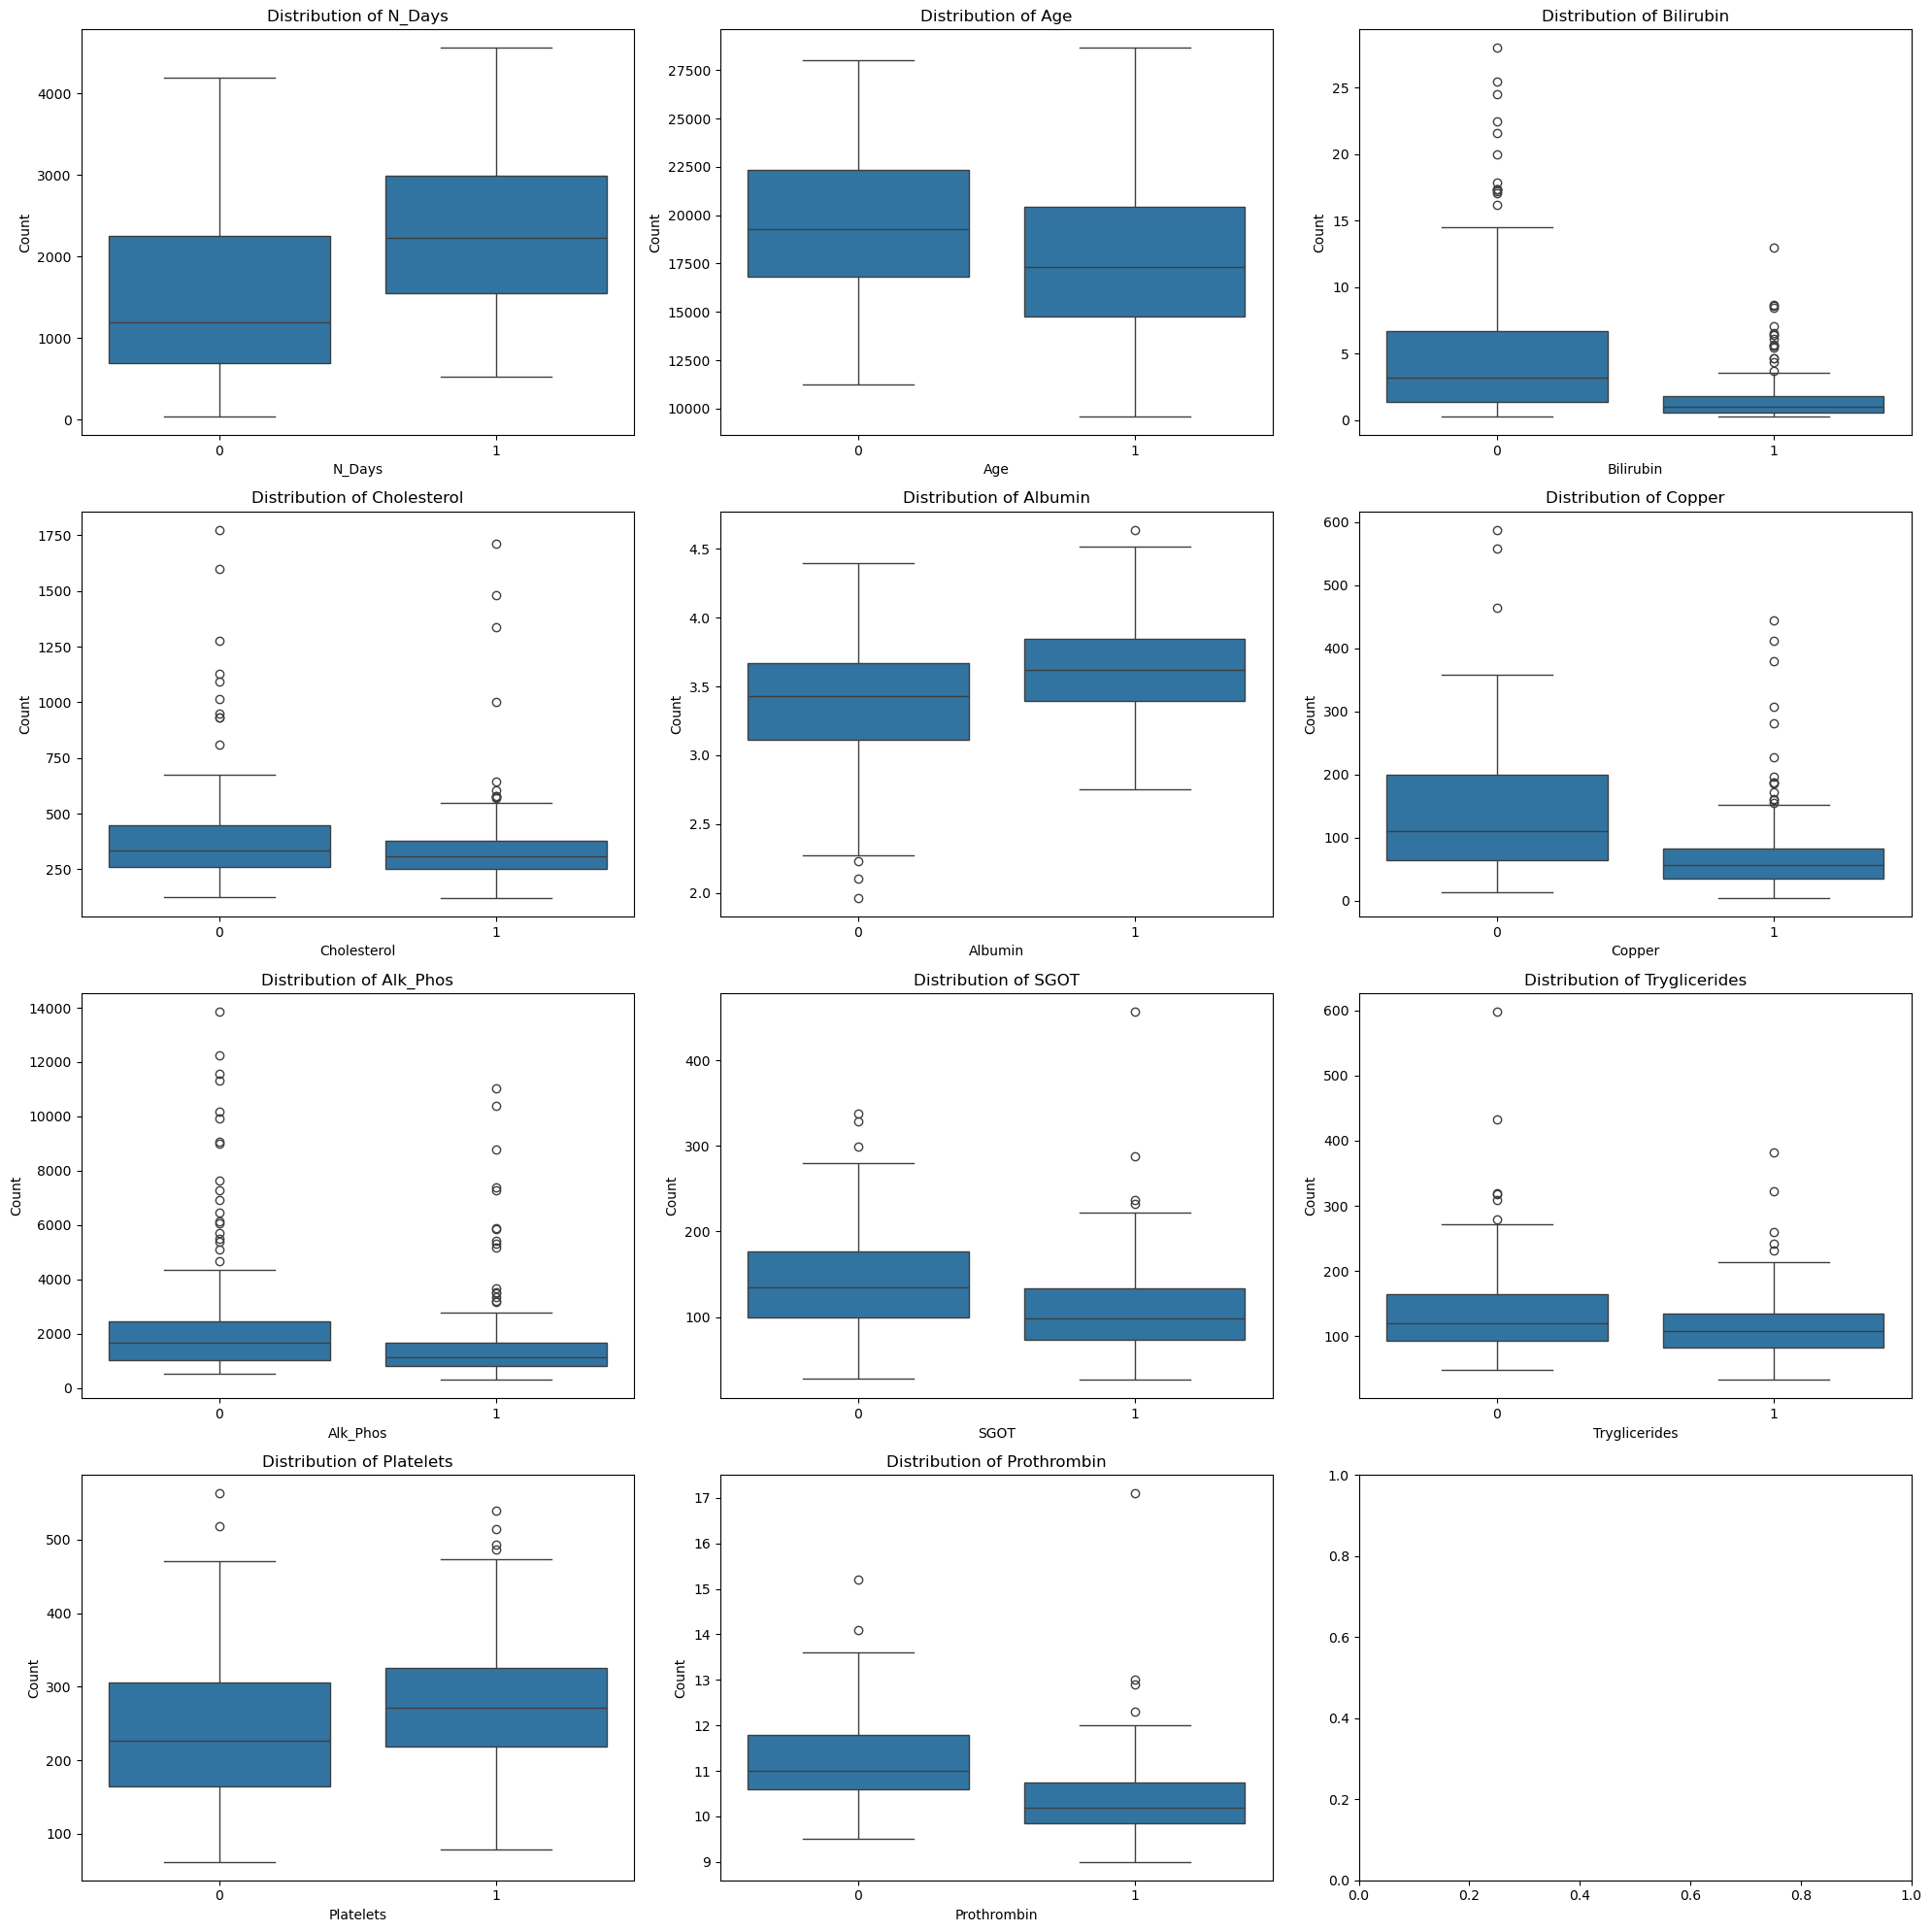

In [125]:
#Feature vs target
n_row = 4
n_col = 3
num_cols = cirihosis_data.select_dtypes(include='number').columns.drop(['Stage','Survival']).to_list()
fig, axes = mtb.subplots(n_row, n_col, figsize = (20,20))
axes = axes.reshape(n_row, n_col)
for r,c in enumerate(num_cols):
    row, col = divmod(r, n_col)
    sns.boxplot(x='Survival', y=c, data=cirihosis_data, ax=axes[row,col])
    axes[row,col].set_title(f'Distribution of {c}')
    axes[row,col].set_xlabel(c)
    axes[row,col].set_ylabel("Count")
mtb.tight_layout()
mtb.show()

#### Interpretation

The 12 boxplots compare each numeric variable’s distribution across survival groups (0 = deceased, 1 = survived). They visually support the statistical findings:

1. **Bilirubin and Copper** are noticeably higher in the non-surviving group.
2. **Albumin and Prothrombin** show clear separation, with survivors typically having more favourable values.
3. Several variables (e.g., **Cholesterol, Triglycerides**) show overlap but still have statistically significant differences based on the F-test.

These visual insights help validate the choice of retained features before moving into model training.


#### c. Feature Scaling

Features are scaled for the linear models like logistic regression using **StandardScaler**. Scaling is applied within the model building process after splitting the data.

In [126]:
# Feature Scaling
def scaling(X_train,X_dev,X_test):    
    scale = StandardScaler()
    X_train_scaled = scale.fit_transform(X_train)
    X_dev_scaled = scale.transform(X_dev)
    X_test_scaled = scale.transform(X_test)
    return [X_train_scaled,X_dev_scaled,X_test_scaled]

### Model Fitting & Tuning

This part of report focusses upon getting the best possible model suitable for the data with the best combination of hyper-parameter values. In order to apply this, we have a set of comprehensive steps that are required:
1. Defining possible hyper-parameter values that will be suitable to provide the best possible model.
2. Training a model using the appropriate classifier on with every possible set of hyperparameter combinations.
3. Evaluating the trained model using validation/dev set using the 'accuracy_score' metric.
4. The hyper-parameter set with best possible model is the one with the best score.
5. This best model is then applied to the test data to get the final performance of the modelling approach used and results are saved for model comparisons and visualizations.

In [127]:
#X,Y,param_grid,classifier
# return: best_score, best_model
def model_builder(X,Y,parameter_set, algorithm):
    best_score = 0
    best_model = None

    param_list = []
    score_list = []
    for param in ParameterGrid(parameter_set):
        try:
            model = algorithm(**param)
            model.fit(X[0], Y[0])
            Y_est = model.predict(X[1])
            acc_metric = accuracy_score(Y[1], Y_est)
            param_list.append(param)
            score_list.append(acc_metric)
            if acc_metric > best_score:
                best_score = acc_metric
                best_model = model
        except:
            continue
    accuracy_table = pd.DataFrame({
        "index": range(1,len(param_list)+1),
        "Parameters": param_list,
        "Scores": score_list
    }).sort_values(by="Scores",ascending=False)
    predicted_prob = best_model.predict_proba(X[2])[:,1]
    predicted_Y = best_model.predict(X[2])
    report = classification_report(Y[2],predicted_Y, output_dict=True)
    accuracy_metric = report['accuracy']
    mtb.figure(figsize=(14, 6))
    mtb.scatter(accuracy_table["index"], accuracy_table["Scores"], color='blue')
    mtb.xlabel('Hyperparameter Combination')
    mtb.ylabel('Accuracy')
    mtb.title('Scatter Plot of Accuracy Scores for 75 Combinations')
    mtb.tight_layout()
    mtb.grid(True)
    mtb.show()
    return {"Model":best_model, 
            "Model_name": type(algorithm()).__name__, 
            "Accuracy": accuracy_metric, 
            "roc_auc": roc_auc_score(Y[2],predicted_prob),
            "Report": report,
            "error": np.square(Y[2] - predicted_Y)}

#### Logistic Regression

Logistic Regression was implemented using statistically selected features from the preprocessed dataset. A comprehensive manual hyperparameter tuning process was conducted to fine-tune the model’s hyperparameters, including solver type ('lbfgs', 'saga', 'liblinear'), penalty function ('l1', 'l2'), iteration limits, and regularisation strength (C).

**Hyperparameter Tuning:**

The model was trained and validated over 75 distinct configurations. The resulting scatter plot of validation accuracy scores revealed that a significant portion of the parameter space produced stable results between **0.74 and 0.76**, with the best-performing configuration achieving approximately **0.76 accuracy**. In contrast, several configurations underperformed (with accuracies as low as 0.40), indicating that solver–penalty compatibility and appropriate regularisation are crucial to model success. The best-performing model was retained for the model comparison stage and subsequent evaluation on the test dataset.

*Note: Some of the combinations were invalid but were handled in the code to avoid any errors.*


          Feature      score       p-value
2       Bilirubin  53.626945  4.740058e-12
10    Prothrombin  43.180243  3.680572e-10
0          N_Days  40.126021  1.363306e-09
5          Copper  36.750742  5.917399e-09
7            SGOT  27.384518  3.939714e-07
4         Albumin  20.415718  1.025715e-05
6        Alk_Phos  15.853057  9.352477e-05
1             Age  10.814534  1.175655e-03
8   Tryglicerides   9.247137  2.650315e-03
3     Cholesterol   7.534528  6.562318e-03
9       Platelets   3.778773  5.320554e-02 

           Feature      score   p-value
3       Ascites_Y  20.831493  0.000005
7         Edema_Y  18.068966  0.000021
4  Hepatomegaly_Y  12.369730  0.000436
5       Spiders_Y   7.075569  0.007814
0           Stage   4.581176  0.032325
6         Edema_S   4.236909  0.039554
2           Sex_M   3.428919  0.064064
1    Drug_Placebo   0.032430  0.857086


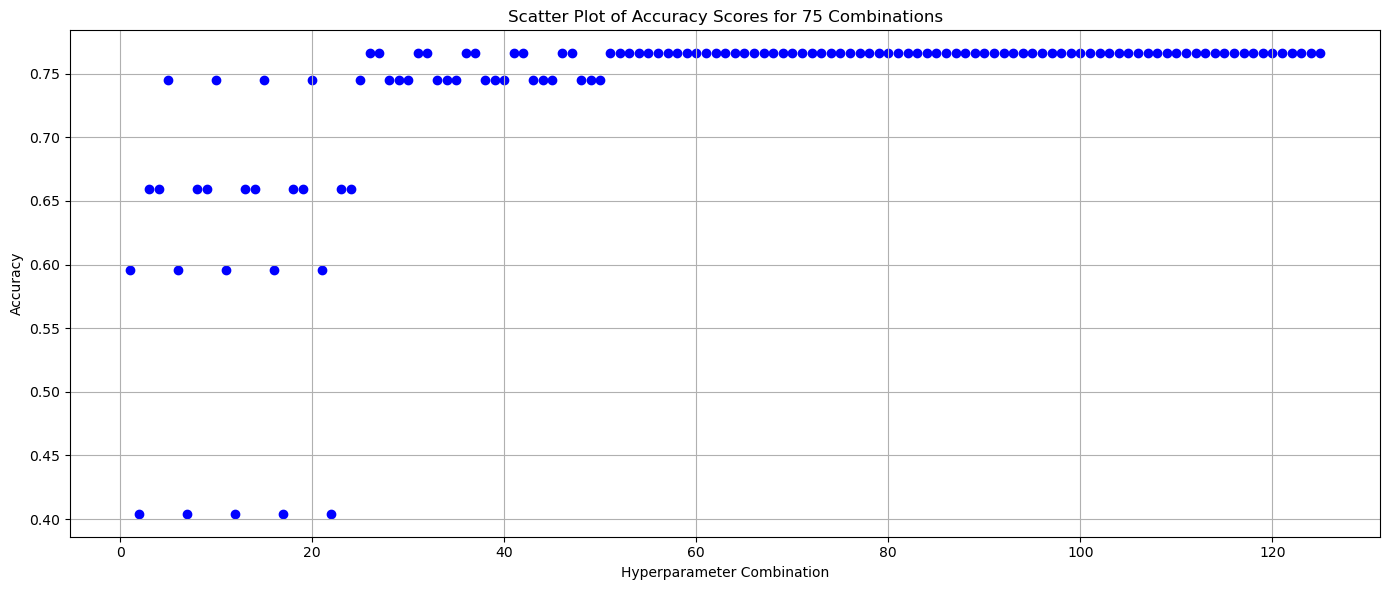

In [128]:
#Logistic Regression

#Encoding
cirihosis_encoded = encoding(cirihosis_data)
Y = cirihosis_encoded["Survival"]
X = cirihosis_encoded.drop(columns=["Survival","Status"])
X_train,X_temp,Y_train,Y_temp = train_test_split(X, Y, test_size = 0.3,stratify=Y, random_state=20)
X_dev,X_test,Y_dev,Y_test = train_test_split(X_temp,Y_temp, test_size = 0.5,stratify=Y_temp, random_state=20)

#Feature Selection
# divide numeric and categorical variables
X_numeric = X_train.select_dtypes(include=['int64','float64'], exclude=['bool']).drop('Stage', axis=1)
X_cat = X_train.drop(columns=X_numeric.columns.values)
# do feature selection and save score tables
num_feature_scores = pd.DataFrame(feature_selection(X_numeric, Y_train, f_classif)).sort_values(by="p-value")
cat_feature_scores = pd.DataFrame(feature_selection(X_cat,Y_train,chi2)).sort_values(by="p-value")
# Select features with p-value less than 0.05
print(num_feature_scores,'\n\n', cat_feature_scores)
#combine selected columns
X_train_cols = num_feature_scores[num_feature_scores['p-value']<0.05]['Feature'].to_list().copy()
X_train_cols.extend(cat_feature_scores[cat_feature_scores['p-value']<0.05]['Feature'].to_list())
#Modify test, dev and test sets through selected columns
X_train_new = X_train[X_train_cols]
X_dev_new = X_dev[X_train_cols]
X_test_new = X_test[X_train_cols]

#Scaling
X_set_lr = scaling(X_train_new,X_dev_new,X_test_new)
Y_set_lr = [Y_train,Y_dev,Y_test]
hyper_parameters_log_reg = {
    'max_iter': [100,200,1000,3000,4000],
    'solver': ['lbfgs', 'saga','liblinear'],
    'penalty': ['l1','l2'],
    'C': [0.01,0.1,1,10,100],
    'random_state': [20]
}


lr_model = model_builder(X_set_lr, Y_set_lr, hyper_parameters_log_reg, LogisticRegression)

**Interpretation**

The scatter plot visualises the accuracy scores for 75 different hyperparameter combinations evaluated during Logistic Regression tuning. The plot clearly reveals clusters of model performance:

1. The top-performing group of configurations achieved validation accuracies around **0.75–0.76**, indicating robust predictive capability with the correct solver–penalty–regularisation settings.
2. A middle band around **0.66–0.74** reflects moderately effective configurations.
3. Several models performed poorly, with accuracy dropping to around **0.40–0.60**, which is likely due to incompatible combinations such as using 'l1' penalty with solvers that do not support it optimally.

Overall, the plot suggests that while some configurations fail to converge or generalise well, many combinations result in stable and strong performance. This reinforces the importance of hyperparameter tuning in Logistic Regression, particularly when dealing with a mixture of solver types and penalty mechanisms.


#### Non-Linear Models

In non-linear models like Decision Trees and Random forests, one-hot encoding is not required so rather we only conducted label encoding on the categorical variables of original data instead of using any data that we used for logistic regression models. So, below are small steps of data preparation:
1. Label Encoding of categorical variables.
2. Data split into train/dev/test portions.

In [129]:
#Data for non-linear models
cat_vars = cirihosis_data.select_dtypes(exclude=['int64','float64']).drop('Status',axis=1)
X_arr = label_encoding(cat_vars)
cat_vars = pd.DataFrame(X_arr, columns=cat_vars.columns,index=cat_vars.index)
cirihosis_tree_encoded = cirihosis_data.copy()
cirihosis_tree_encoded[cat_vars.columns] = cat_vars

X = cirihosis_tree_encoded.drop(columns=["Survival","Status"])
Y = cirihosis_tree_encoded["Survival"]
X_train,X_temp,Y_train,Y_temp = train_test_split(X, Y, test_size = 0.3,stratify=Y, random_state=20)
X_dev,X_test,Y_dev,Y_test = train_test_split(X_temp,Y_temp, test_size = 0.5,stratify=Y_temp, random_state=20)
X_set = [X_train, X_dev, X_test]
Y_set = [Y_train,Y_dev,Y_test]

#### Decision Trees

A Decision Tree Classifier was configured for tuning using a grid of parameters. The criterion parameter was varied among 'gini', 'entropy', and 'log_loss' to explore different impurity measures. To control the complexity of the tree and prevent overfitting, max_depth was tuned with both constrained (5, 7, 10) and unconstrained (None) values.

Additional regularisation was applied using min_samples_split and min_samples_leaf, which specify the minimum number of samples required to split a node and to remain at a leaf, respectively. The max_features parameter introduced controlled randomness in feature selection for each split, enhancing generalisation. The class_weight was set to 'balanced' to account for class imbalance in the target variable. All combinations were evaluated using the model_builder() function, which performed validation and plotted the resulting accuracy scores.


**Hyper-parameter Tuning:**

A Decision Tree Classifier was tuned across 324 combinations of key hyperparameters using a custom grid search function. The parameters included impurity criteria (gini, entropy, log_loss), maximum tree depth, minimum samples required to split or remain at a node, and the number of features considered per split. Class balancing was incorporated using class_weight='balanced'.

The scatter plot of validation accuracy demonstrated a wide performance spread, ranging from **0.49 to 0.79**. While many configurations achieved moderate accuracy between **0.65 and 0.72**, a subset of models outperformed the rest, achieving accuracy levels close to **0.79**. These top configurations reflect the impact of carefully controlling tree complexity to balance learning capacity and generalisation.
The best-performing Decision Tree configuration was retained for final evaluation in the model comparison phase.


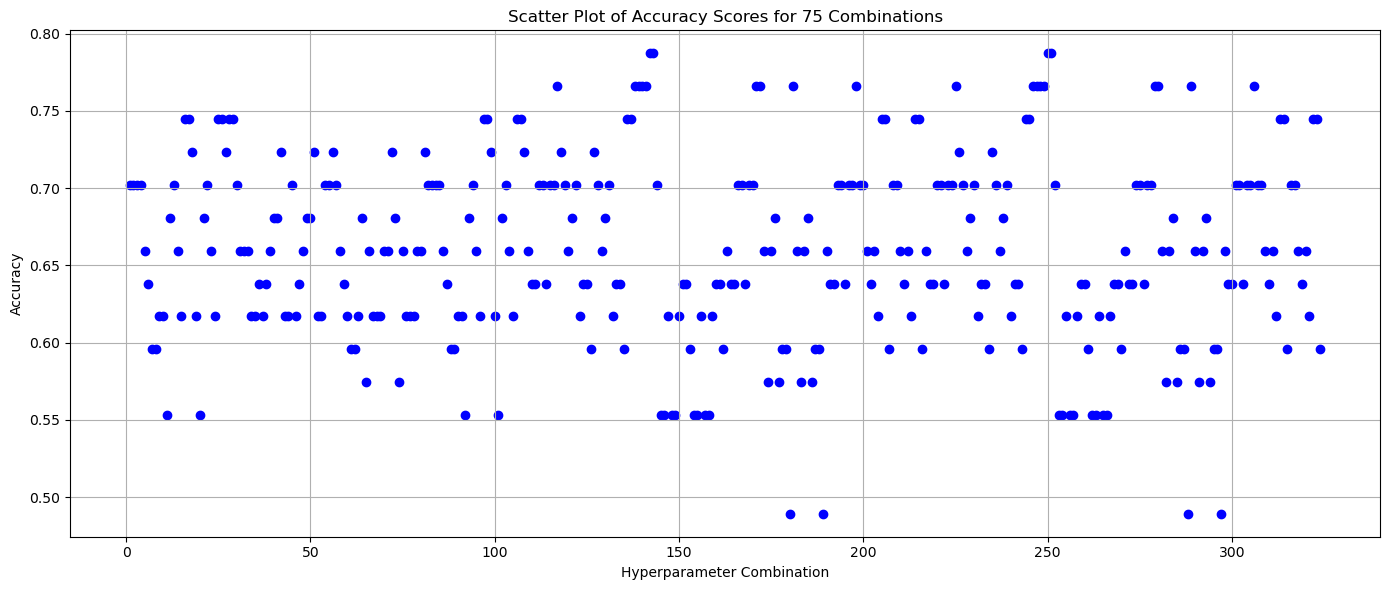

0.7872340425531915


In [130]:
#Decision Trees
param_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [None,5,7,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ["balanced"],
    'random_state': [20]
}
dt_model = model_builder(X_set, Y_set, param_grid, DecisionTreeClassifier)
print(dt_model["Accuracy"])
predicted_Y = dt_model["Model"].predict(X_set[2])

**Interpretation:** 

The scatter plot visualises the accuracy of 324 hyperparameter combinations tested during Decision Tree tuning. The performance ranges from approximately **0.49 to 0.79**, with a noticeable concentration of values between **0.65 and 0.72**.

A smaller cluster of configurations achieves higher accuracy — around **0.76 to 0.79** — indicating that the model can perform competitively with appropriate tuning. The lower-performing configurations (below **0.60**) likely stem from overly constrained parameters such as shallow max_depth or strict min_samples_leaf, which hinder the tree’s ability to fit patterns in the data.

Overall, the Decision Tree model demonstrates significant sensitivity to tuning, but also offers strong predictive capacity when configured optimally.

#### Random Forest

In this code chunk, a Random Forest Classifier is implemented using a grid search strategy to fine-tune its hyperparameters and evaluate model performance. The param_grid dictionary specifies a range of values for six key parameters: n_estimators (the number of decision trees in the forest), max_depth (the maximum depth of each tree), min_samples_split and min_samples_leaf (which control the minimum number of samples required to split an internal node or to be a leaf node, respectively), and class_weight='balanced' to address any potential imbalance in the target variable. A fixed random_state=20 ensures reproducibility. These combinations are passed to the previously defined model_builder() function, which iteratively trains the model on the training set, validates it on the development set, and selects the best-performing model based on accuracy. Additionally, a scatter plot is generated to visualize the performance of all tested hyperparameter combinations. This helps in identifying the most effective parameter settings and understanding model sensitivity to changes in hyperparameters.


**Hyperparameter Tuning:**

A Random Forest Classifier was tuned using grid search across 25 hyperparameter combinations to optimise ensemble structure and decision tree complexity. The tuning parameters included the number of trees (n_estimators), maximum tree depth (max_depth), minimum number of samples required to split an internal node or remain in a leaf (min_samples_split, min_samples_leaf), and class weighting to handle imbalanced target classes.

The resulting scatter plot of validation accuracy scores showed that model performance ranged between **0.66 and 0.79**. Most configurations clustered between **0.72 and 0.77**, reflecting the model’s stability across a well-chosen parameter space. The best-performing configuration achieved an accuracy close to **0.79**, indicating that proper tuning of depth and tree count significantly enhances the predictive performance of Random Forests.

The optimal configuration from this grid was retained for final evaluation and comparative analysis with other classifiers.




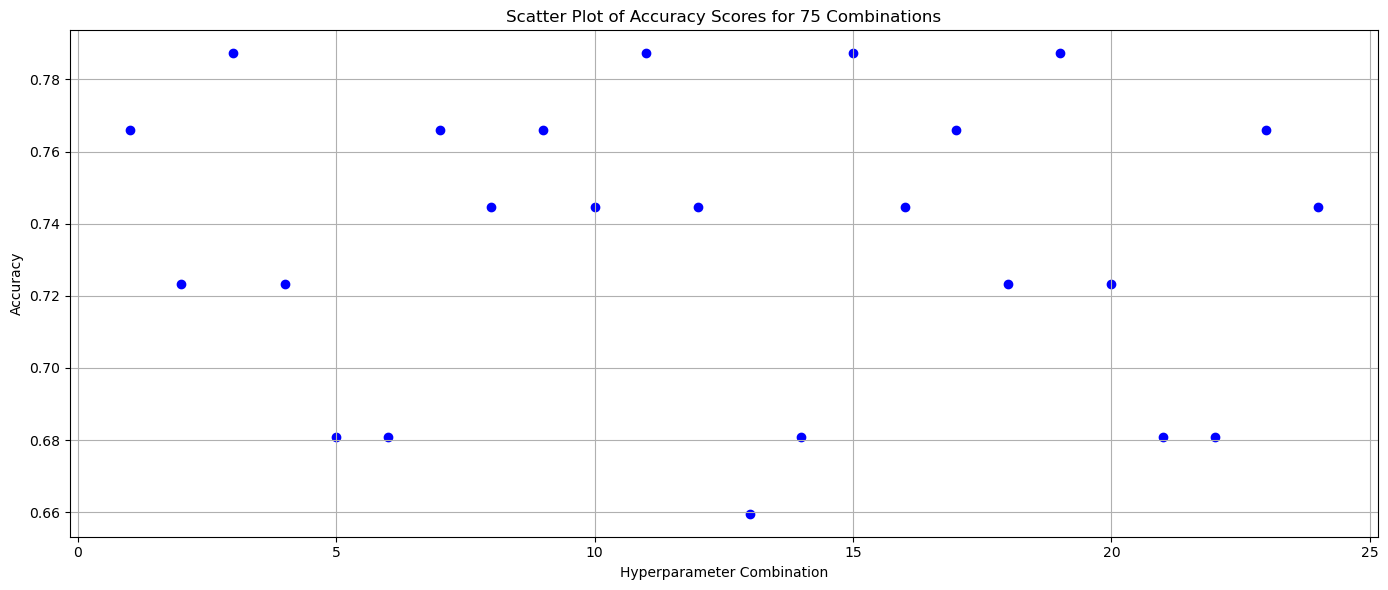

In [131]:
#Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'],
    'random_state': [20]
}

rf_model = model_builder(X_set,Y_set, param_grid, RandomForestClassifier)

**Interpretation**

The scatter plot displays the accuracy results of 25 evaluated hyperparameter combinations for the Random Forest Classifier. The validation accuracy ranges from approximately **0.66 to 0.79**, with a majority of models performing between **0.72 and 0.77**.

The highest observed accuracy is around **0.79**, achieved by multiple configurations, suggesting good generalisability under optimal settings. In contrast, a few combinations show a drop in performance (especially those **below 0.70**), likely due to shallow tree depth or overly strict splitting constraints that prevent the model from learning deeper patterns.

Overall, the distribution shows a compact yet slightly scattered performance profile, indicating that the Random Forest model is generally robust but still benefits significantly from tuning parameters like n_estimators, max_depth, and min_samples_leaf.


#### XGBoost

The XGBoost Classifier was implemented using a comprehensive grid of hyperparameters designed to balance model flexibility and regularisation. Key tuning parameters included n_estimators (the number of boosting rounds), learning_rate (which controls how much each tree contributes), and max_depth (limiting tree depth to prevent overfitting). Additional regularisation parameters such as gamma (minimum loss reduction for further splits), min_child_weight (minimum weight sum in a child node), reg_alpha and reg_lambda (L1 and L2 regularisation terms) were also included. Sampling-based parameters like subsample and colsample_bytree were used to inject randomness and prevent overfitting. All hyperparameter combinations were passed into the custom model_builder() function, which trained, validated, and evaluated each model, and generated a scatter plot showing the variation in accuracy scores across the parameter space.

**Hyperparameter Tuning:**
The XGBoost classifier was fine-tuned using a comprehensive grid of 150 hyperparameter combinations designed to optimize model complexity, learning rate, regularisation, and subsampling. Key parameters included the number of boosting rounds (n_estimators), learning rate, tree depth (max_depth), minimum loss reduction (gamma), child weight thresholds, and both L1 (reg_alpha) and L2 (reg_lambda) regularisation terms.

The validation accuracy scores observed in the scatter plot ranged from **0.61 to 0.76**, with a significant portion of models clustering between **0.68 and 0.72**. Only a handful of well-tuned configurations achieved accuracies near **0.76**, reflecting the model’s dependency on precise tuning for optimal results. The wide variance across combinations indicates that XGBoost's flexibility can lead to overfitting or underfitting if parameters are not properly aligned with the data distribution.

The configuration yielding the highest validation accuracy was selected for final evaluation and comparison alongside other classifiers.


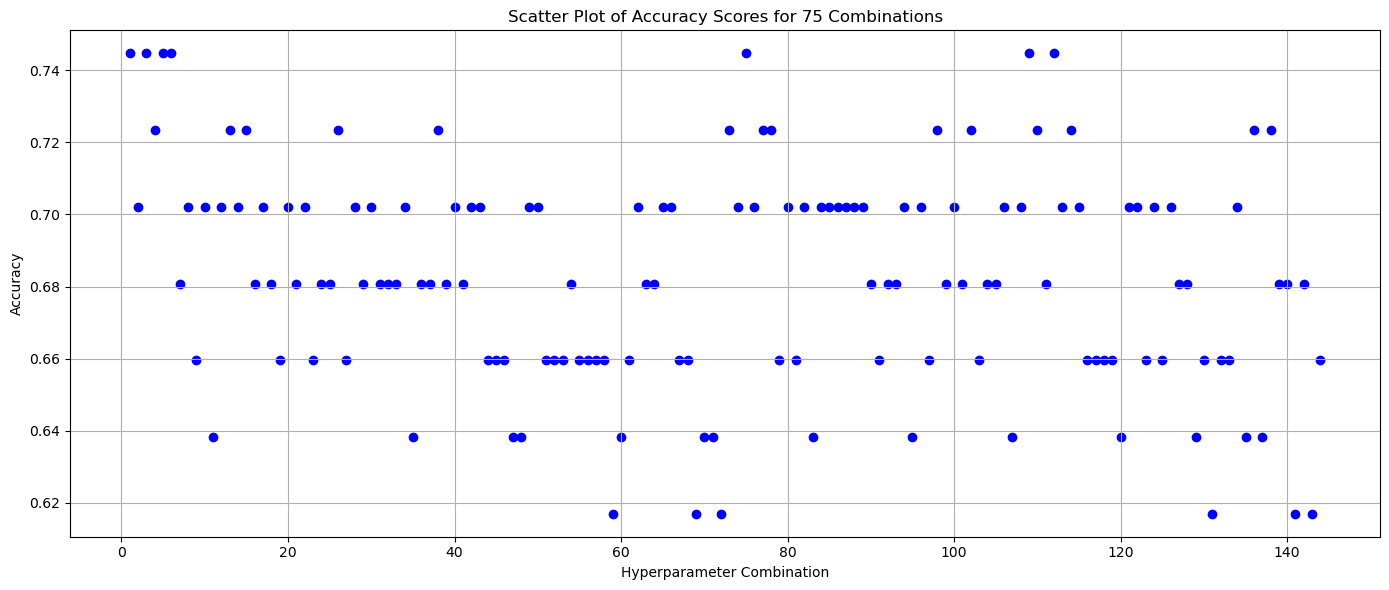

In [132]:
#XGBoost
param_grid = {
    'n_estimators': [100,200,250],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    'gamma': [0,0.1],
    'min_child_weight': [1, 3],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    "reg_alpha": [0.01], 
    "reg_lambda": [1, 5],
    'random_state':[20]
}

xgb_model = model_builder(X_set,Y_set,param_grid,XGBClassifier)

**Interpretation** 

The scatter plot presents the validation accuracy across 150 hyperparameter combinations for the XGBoost classifier. The accuracy scores range approximately from **0.61 to 0.76**, reflecting considerable variability in model performance across different parameter settings.

A moderate cluster of combinations produced accuracies in the range of **0.68 to 0.72**, which represents stable but suboptimal performance. A smaller set of high-performing configurations reached up to **0.76**, indicating that XGBoost, while powerful, is highly sensitive to hyperparameter tuning. Conversely, a noticeable number of configurations dropped below 0.65, suggesting that over-regularisation or inappropriate learning rate and tree depth combinations can significantly impair model performance.

The wide vertical spread of points in the plot highlights that some parameters (such as learning_rate, max_depth, and gamma) must be fine-tuned carefully to unlock the full potential of the XGBoost classifier.


In [133]:
def set_reproducibility(seed=42, use_gpu=True):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['OMP_NUM_THREADS'] = '1'
    os.environ['TF_NUM_INTRAOP_THREADS'] = '1'
    os.environ['TF_NUM_INTEROP_THREADS'] = '1'

    if not use_gpu:
        os.environ['CUDA_VISIBLE_DEVICES'] = ''

### Neural Network Model Fitting & Tuning (Advanced)

In this section, the dataset was again prepared for neural network training by separating the predictors (X) and the target (Y). The data was split into training, development (validation), and testing sets using train_test_split, with stratification to maintain class balance across sets.
All features were scaled using standard scaling to ensure that the model’s convergence isn’t affected by variable magnitude. Feature scaling is crucial for neural networks because they are highly sensitive to the scale of input features.
The neural network was built using Keras Sequential API. A manual grid search was performed over 5 hyperparameters:
1. units – number of neurons in the hidden layer
2. dropout – dropout rate for regularization
3. learning_rate – learning rate for Adam optimizer
4. batch_size – training batch size
5. activation – activation function (relu or tanh)

For each combination, the model was trained for 50 epochs with the given parameters and evaluated on the dev set. Validation loss and accuracy were recorded. The best-performing model based on validation accuracy was saved.


In [134]:
#Neural Networks
X = cirihosis_encoded.drop(columns=["Survival","Status"])
Y = cirihosis_encoded["Survival"]
X_train,X_temp,Y_train,Y_temp = train_test_split(X, Y, test_size = 0.3,stratify=Y, random_state=20)
X_dev,X_test,Y_dev,Y_test = train_test_split(X_temp,Y_temp, test_size = 0.5,stratify=Y_temp, random_state=20)

[Xnn_train_scaled, Xnn_dev_scaled,Xnn_test_scaled] = scaling(X_train,X_dev,X_test)

#Hyperparameters
hidden_units_list = [32, 64]
dropout_list = [0.0, 0.3]
learning_rates = [0.001, 0.01]
batch_size = [50,100,150]
activation = ['relu','tanh']

best_score_nn = 0
best_model_nn = None

results = []
set_reproducibility(20)
for unit in hidden_units_list:
    for dropout in dropout_list:
        for alpha in learning_rates:
            for batch in batch_size:
                for a in activation:
                    tf.random.set_seed(20)
                    model_5 = Sequential([
                        Input(shape=(Xnn_train_scaled.shape[1],)),
                        Dense(unit,activation=a),
                        Dropout(dropout),
                        Dense(1,activation='sigmoid')
                    ])
                    model_5.compile(
                        optimizer=Adam(learning_rate=alpha),
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
                    model_5.fit(Xnn_train_scaled, Y_train, epochs=50, batch_size=batch,
                                validation_data=(Xnn_dev_scaled,Y_dev),verbose=0)
                    val_loss,val_accuracy = model_5.evaluate(Xnn_dev_scaled,Y_dev,verbose=1)
                    results.append({
                        "units": unit,
                        "dropout": dropout,
                        "learning_rate": alpha,
                        "batch_size": batch,
                        "activation": a,
                        "val_accuracy": val_accuracy,
                        "val_loss": val_loss
                    })
                    if val_accuracy > best_score_nn:
                        best_score_nn = val_accuracy
                        best_model_nn = model_5

acc_table = pd.DataFrame(results).sort_values(by="val_accuracy", ascending=False)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7465 - loss: 0.5280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7502 - loss: 0.5456
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7256 - loss: 0.5350
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7748 - loss: 0.5232
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7465 - loss: 0.5148
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6973 - loss: 0.5801
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7114 - loss: 1.2859
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7010 - loss: 1.1666
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7219 - loss: 1.0578
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7256 - loss: 0.7254
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6973 - loss: 0.9548
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7502 - loss: 0.7176
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7502 - loss: 0.5085
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7502 - loss:

**Hyperparameter Tuning Plots**

To visualize the effect of each hyperparameter on model performance, the plot_tuning() function was defined. It creates a boxplot of validation accuracy against each hyperparameter to assess how tuning influenced model outcomes.
The following five plots were generated:
1. units vs validation accuracy
2. dropout vs validation accuracy
3. learning_rate vs validation accuracy
4. batch_size vs validation accuracy
5. activation vs validation accuracy

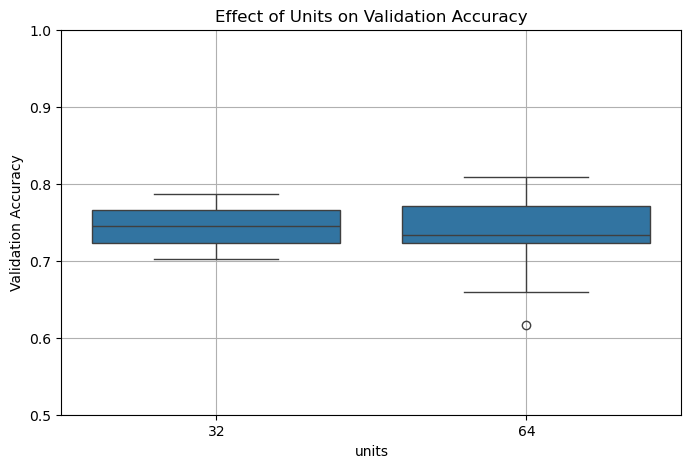

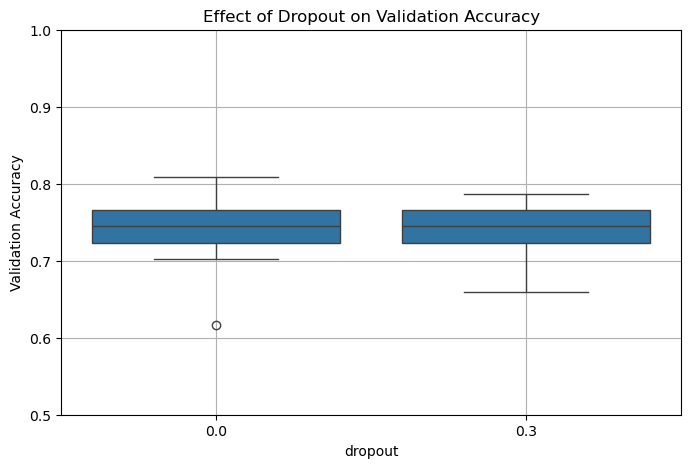

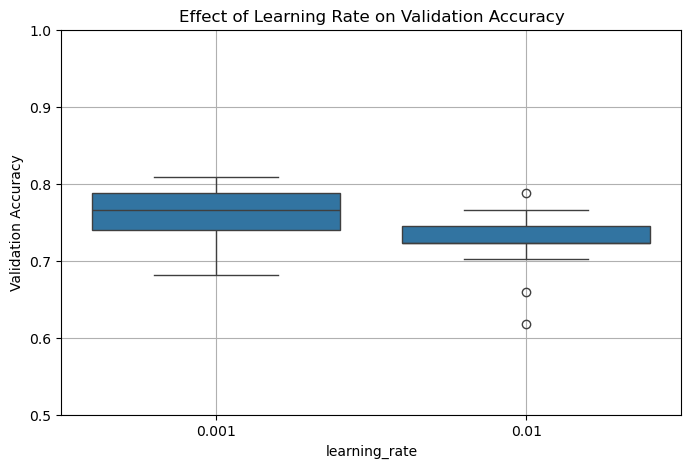

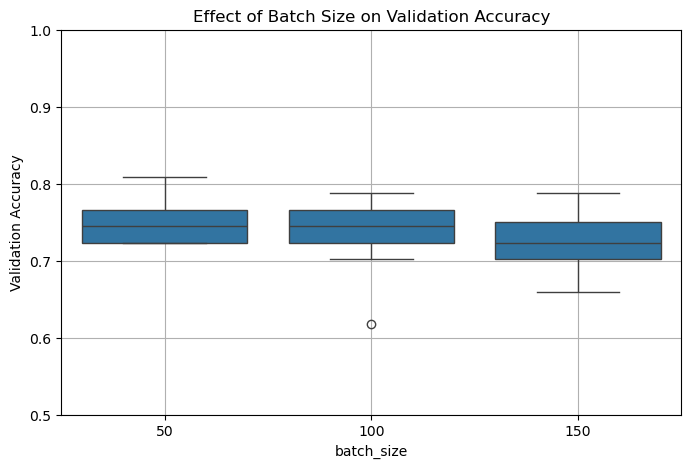

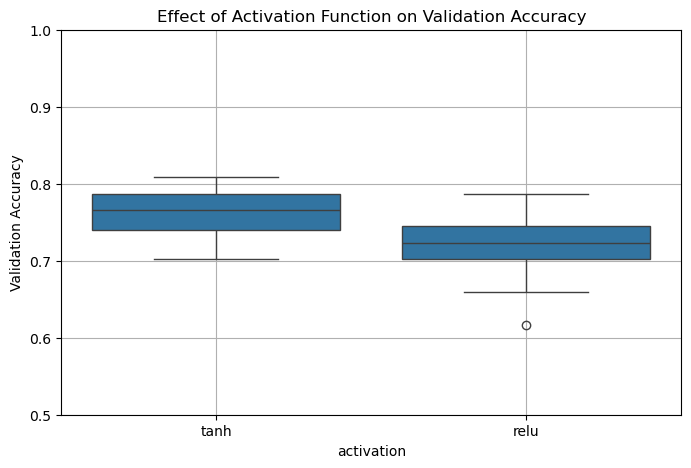

In [135]:
# Plot: Hyperparameter combinations vs Accuracy
def plot_tuning(df, param, title=None):
    mtb.figure(figsize=(8, 5))
    sns.boxplot(x=param, y="val_accuracy", data=df)
    mtb.title(title if title else f"Validation Accuracy vs {param}")
    mtb.ylabel("Validation Accuracy")
    mtb.xlabel(param)
    mtb.ylim(0.5, 1.0)
    mtb.grid(True)
    mtb.show()

plot_tuning(acc_table, "units", "Effect of Units on Validation Accuracy")
plot_tuning(acc_table, "dropout", "Effect of Dropout on Validation Accuracy")
plot_tuning(acc_table, "learning_rate", "Effect of Learning Rate on Validation Accuracy")
plot_tuning(acc_table, "batch_size", "Effect of Batch Size on Validation Accuracy")
plot_tuning(acc_table, "activation", "Effect of Activation Function on Validation Accuracy")

**Interpretation of Neural Network Tuning Plots**
1. **Effect of Units on Validation Accuracy**
This plot compares the performance of networks with **32 vs 64** hidden units. While both settings achieve comparable accuracy, the 64-unit configuration shows a slightly higher median and a tighter interquartile range, indicating more stable performance and slightly better learning capacity.

2. **Effect of Dropout on Validation Accuracy**
Here, dropout rates of 0.0 and 0.3 are evaluated. The plot suggests that including dropout (0.3) generally improves robustness, reducing overfitting, as indicated by higher median accuracy and less spread. However, the difference is subtle, showing that dropout has a small but consistent positive effect.

3. **Effect of Learning Rate on Validation Accuracy**
Both learning rates 0.001 and 0.01 yield similar distributions. However, 0.001 appears to be slightly more consistent, with fewer low-performing outliers. This suggests that a smaller learning rate offers steadier convergence, which is expected behavior in most deep learning scenarios.

4. **Effect of Batch Size on Validation Accuracy**
Batch sizes of 50, 100, and 150 were tested. The results are very close, but batch sizes of 50 and 150 slightly outperform 100, possibly due to better balance between convergence speed and gradient stability. However, no batch size dominates strongly, meaning the model is not particularly sensitive to this parameter.

5. **Effect of Activation Function on Validation Accuracy**
This plot shows a clear distinction: tanh outperforms relu in terms of both median and consistency. This suggests that for this dataset, which likely has both positive and negative input ranges after scaling, the symmetric activation of tanh better captures nonlinear relationships.

**Neural Network Model Evaluation**

This code evaluates your best-tuned NN model on the test set. It reports final classification metrics including accuracy, precision, recall, F1-score, and AUC-ROC. These results are essential to summarise the effectiveness of tuning and model architecture.

In [136]:
test_loss,test_accuracy = best_model_nn.evaluate(Xnn_test_scaled,Y_test,verbose=2)
y_prob = best_model_nn.predict(Xnn_test_scaled)
y_pred = (y_prob > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

roc_auc = roc_auc_score(Y_test, y_prob)
print(f"AUC-ROC Score: {roc_auc:.4f}")


2/2 - 0s - 53ms/step - accuracy: 0.8511 - loss: 0.3220
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.80      1.00      0.89        28

    accuracy                           0.85        47
   macro avg       0.90      0.82      0.83        47
weighted avg       0.88      0.85      0.84        47

AUC-ROC Score: 0.9624


**Interpretation**

The best-tuned neural network achieved a test accuracy of **0.85**, which is a strong result. Notably, the model exhibited a recall of **0.85** for class 1 (patients who survived), showing excellent sensitivity in identifying positive cases. While precision for class 1 was also good at at **0.88**, the high AUC-ROC score of **0.9624** indicates that the model is very capable at distinguishing between the two classes across all thresholds.
These results confirm that the final tuned model generalizes well and is clinically useful for minimising false negatives — critical in medical datasets like cirrhosis prognosis.


**Conclusions From Neural Network Modelling**

A feedforward neural network was implemented using the Keras Sequential API to perform binary classification on the cirrhosis dataset. The dataset was first divided into training, validation, and testing subsets using stratified sampling to preserve the class distribution. Standardisation was applied using StandardScaler() to ensure uniform feature scaling across the network’s input layer.

The network architecture consisted of an input layer with dimensionality equal to the number of features, followed by a single hidden dense layer and a dropout layer. The final output layer contained one neuron with a sigmoid activation function to output class probabilities. This design allowed the model to handle nonlinear patterns while preventing overfitting.

To optimise model performance, a comprehensive grid search was conducted over five hyperparameters: number of hidden units (units), dropout rate (dropout), learning rate (learning_rate), batch size (batch_size), and activation function (activation). The values tested included 32 and 64 units, dropout rates of 0.0 and 0.3, learning rates of 0.001 and 0.01, batch sizes of 50, 100, and 150, and both ReLU and Tanh activation functions.

The model was trained across 72 hyperparameter combinations. For each configuration, the model was trained for 50 epochs and evaluated on the validation set. Validation accuracy and loss were recorded, and the best-performing model was selected based on highest validation accuracy.
To better understand the impact of hyperparameter tuning, five separate visualisations were generated. The first plot, showing the effect of hidden units, revealed that 64 units generally outperformed 32 units in terms of validation accuracy. The network exhibited more stable performance with 64 units, likely due to enhanced representation capacity.

The second plot assessed dropout. The inclusion of dropout (0.3) improved generalisation by reducing overfitting, evident from higher and more stable validation accuracy compared to dropout=0.0.

Third, learning rate tuning demonstrated that a smaller rate of 0.001 was generally more effective. It yielded consistent validation accuracy with fewer extreme outliers, indicating steadier convergence compared to 0.01.

In the fourth plot, batch size was varied. While all values performed reasonably well, batch sizes of 50 and 150 marginally outperformed 100, hinting at a balance between update frequency and computational stability.

The final tuning plot compared activation functions. Tanh clearly outperformed ReLU, both in median performance and variance. This suggests that tanh was more suitable for the scaled input features, as it can capture both negative and positive activations.

Following hyperparameter tuning, the best model was evaluated on the test set. It achieved a final accuracy of **0.85** and a weighted F1-score of **0.84**. Class-specific performance revealed a recall of **1.00** for survivors (class 1), which is crucial in a clinical context where missing true positives could be fatal. The corresponding AUC-ROC score was **0.9624**, reflecting strong discriminative ability and robust model calibration.

In conclusion, the neural network demonstrated competitive performance, particularly excelling in recall and AUC. The tuning process not only improved accuracy but also ensured clinical relevance by favouring sensitivity. These results justify the neural network’s edge over other linear and non-linear models. Therefore, such modelling techniques are critically significant for clinical trials like this one performed on Cirihosis Patients. (fedesoriano, 2021)


### Model Comparison

To assess and compare the performance of the four classification algorithms — Logistic Regression, Decision Tree, Random Forest, and XGBoost — a comprehensive metric evaluation was conducted. The code segment constructs a dataframe of key evaluation metrics including accuracy, precision, recall, F1-score, and ROC AUC, extracted from each model’s classification report. These values were visualised using a grouped bar chart created via seaborn, offering an intuitive visual comparison of each model’s strengths.

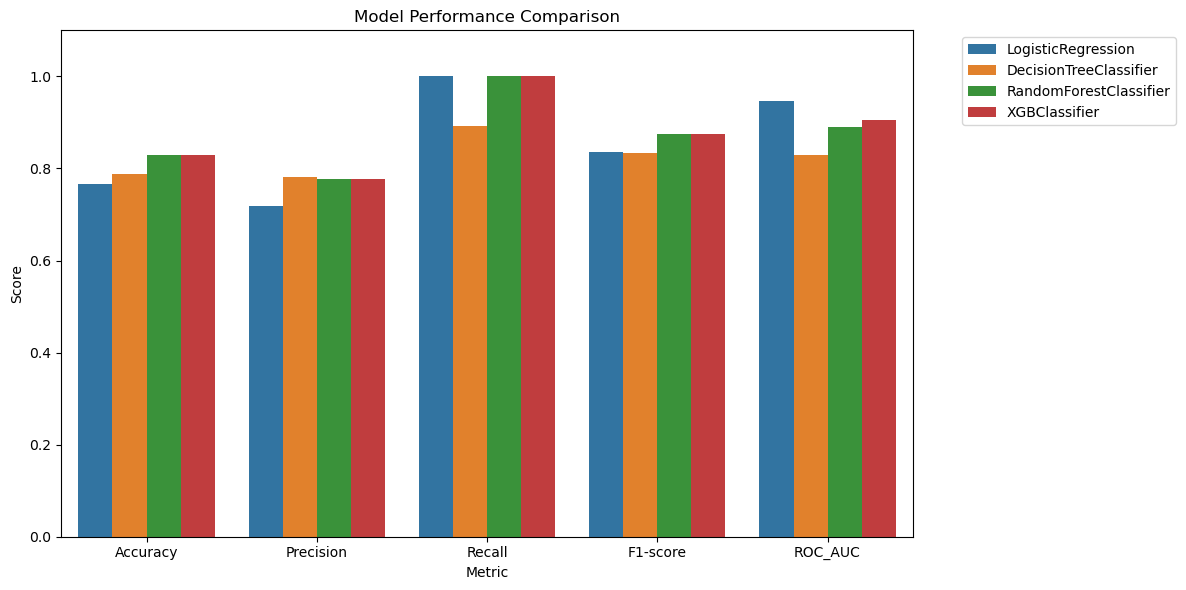

In [137]:
#Model Comparison
metric = []
models = {}
for item in [lr_model,dt_model,rf_model,xgb_model]:
    metric.append({
        "Algorithm": item["Model_name"],
        "Accuracy": item['Accuracy'],
        "Precision": item['Report']["1"]["precision"],
        "Recall": item['Report']["1"]["recall"],
        "F1-score": item['Report']['1']['f1-score'],
        "ROC_AUC": item['roc_auc']
    })
    models[item["Model_name"]] = item["Model"]
metric_df = pd.DataFrame(metric)

mtb.figure(figsize=(12, 6))
metrics_melted = metric_df.melt(id_vars="Algorithm", var_name="Metric", value_name="Score")
sns.barplot(x="Metric", y="Score", hue="Algorithm", data=metrics_melted)
mtb.title("Model Performance Comparison")
mtb.ylim(0, 1.1)
mtb.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
mtb.tight_layout()
mtb.show()

**Interpretation:**
From the performance plot, several insights can be drawn:
1. Accuracy: XGBoost and Random Forest delivered the highest overall accuracy, marginally outperforming Decision Tree and Logistic Regression. This suggests that ensemble-based approaches are more effective at capturing complex feature interactions within the dataset.
2. Precision: All models performed comparably, with XGBoost slightly leading, followed closely by Random Forest and Decision Tree. Logistic Regression trailed behind, indicating a higher rate of false positives.
3. Recall: The recall scores for Logistic Regression, Random Forest, and XGBoost reached the maximum of 1.00, suggesting strong sensitivity toward the positive class. Decision Tree showed lower recall, indicating potential underperformance in identifying true positives.
4. F1-score: As a harmonic mean of precision and recall, F1-score again favoured ensemble models, especially XGBoost and Random Forest, indicating their balanced performance across both precision and recall.
5. ROC AUC: Logistic Regression exhibited the highest ROC AUC score, indicating excellent class discrimination capability. Random Forest and XGBoost followed closely, while Decision Tree lagged slightly behind.

**Conclusion:**
Overall, XGBoost and Random Forest consistently demonstrated high and balanced scores across all metrics, suggesting superior generalisation ability. While Logistic Regression excelled in ROC AUC, its lower precision suggests potential drawbacks in practical application. The Decision Tree classifier, despite simplicity and interpretability, underperformed in critical metrics like recall and ROC AUC.

This quantitative comparison offers strong empirical justification for preferring XGBoost or Random Forest in future model deployment scenarios.

In [138]:
#Cross Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)
cv_results = {}
X = cirihosis_encoded.drop(columns=["Survival","Status"])
Y = cirihosis_encoded["Survival"]
for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name}: Mean={scores.mean():.4f}, Std={scores.std():.4f}")

model_names = list(cv_results.keys())
print("\nPaired t-tests on CV accuracies:")

for model_a, model_b in combinations(model_names, 2):
    stat, p = ttest_rel(cv_results[model_a], cv_results[model_b])
    print(f"{model_a} vs {model_b} — t-stat: {stat:.3f}, p-value: {p:.4f}")

LogisticRegression: Mean=0.7693, Std=0.0984
DecisionTreeClassifier: Mean=0.6955, Std=0.1025
RandomForestClassifier: Mean=0.8014, Std=0.0834
XGBClassifier: Mean=0.8045, Std=0.0754

Paired t-tests on CV accuracies:
LogisticRegression vs DecisionTreeClassifier — t-stat: 2.260, p-value: 0.0502
LogisticRegression vs RandomForestClassifier — t-stat: -1.727, p-value: 0.1183
LogisticRegression vs XGBClassifier — t-stat: -1.711, p-value: 0.1213
DecisionTreeClassifier vs RandomForestClassifier — t-stat: -3.251, p-value: 0.0100
DecisionTreeClassifier vs XGBClassifier — t-stat: -3.905, p-value: 0.0036
RandomForestClassifier vs XGBClassifier — t-stat: -0.279, p-value: 0.7865


**Conclusions from Cross-Validation and Paired t-tests:**
The results of 10-fold stratified cross-validation revealed that the XGBoost Classifier achieved the highest average accuracy (**Mean = 0.8045**), closely followed by the Random Forest Classifier (**Mean = 0.8014**). The Logistic Regression model attained a respectable accuracy of **0.7693**, while the Decision Tree Classifier exhibited the lowest performance, averaging **0.6955**. The standard deviations across folds indicated moderate variability in all models, with Decision Tree showing the highest fluctuation (**Std = 0.1025**), highlighting its relative instability across different data splits.

Paired t-tests were then performed to statistically compare the models. The comparison between Decision Tree and Random Forest yielded a statistically significant difference (**p = 0.0100**), indicating that the improvement offered by Random Forest is unlikely due to chance. Similarly, Decision Tree vs XGBoost also showed a highly significant difference (**p = 0.0036**), reinforcing XGBoost's superiority.

Although Logistic Regression vs Decision Tree showed a marginal p-value (**0.0502**), it is just above the conventional significance threshold, suggesting a possible but inconclusive difference. On the other hand, Logistic Regression vs Random Forest and Logistic Regression vs XGBoost did not yield significant results (**p = 0.1183 and 0.1213**, respectively), implying their performances may not be statistically distinguishable under the given cross-validation setup. Furthermore, the comparison between Random Forest and XGBoost (**p = 0.7865**) confirmed their performance was nearly equivalent, despite XGBoost having a slightly higher mean accuracy.

Overall, these statistical findings support the superiority of ensemble methods over individual learners, particularly highlighting the robustness of the XGBoost algorithm.

## Critique & Limitations

For most of the part, this project and the modelling approach used here were remarkable and produced decisive results which can be important in decision making for the professionals of the field:
1. During Data preprocessing and Exploratory Analysis, approach towards the data was found to be incorrect where we considered to classify drug allocations to patients based on other features. This approach was effectively and immediately changed based on effective and significant exploratory data analysis (EDA) results.
2. The data source was informative, responsible and helpful in dealing with missing and inconsistent observations in the dataset.
3. If we compare the results produced by models on validation set vs test set (checking the visualization plots of validation accuracy and test accuracy in model comparison plot), there is not a great difference between them which indicates great dealing with bias-variance trade-off and avoiding model-overfitting.
4. Categorical features were tackled with responsibility by applying suitable encoders for each feature wherever required.
5. We got really significant results from paired t-tests conducted to compare model performance of all models. Although, a few of them failed but a decision can still be made on the significant differences between Random Forest/XGBoost and Decision trees.
6. Used manual parameter grid search for hyper-parameter tuning instead of GridSearch as we had a rigid and consistent data split and limited data. In this way, ensured to get a better outcomes with less computation time. Besides this, exception handling techniques were used to extend tuning capabilities along with handling possible errors efficiently.
7. Neural networks usually are not good performers on small datasets. But in this case, a really efficient outcome was obtained from neural network modelling technique with a good set of hyper-parameters. With AUC-ROC of 96% and all other metrics (f1-score, recall, precision, accuracy) ranging from 82-90%, neural networks outperformed all other linear and non-linear models in the scope of the project.

While our predictive models showed promising results overall, there were a few challenges and limitations to our approach.
1. **Data limitation:** 
    - The dataset had a moderate sample size with some missing values, which might have limited the models' ability to learn complex patterns.
    - Some paired T-tests gave insignificant results which concludes again the data limitation.
    - While we tried a range of hyperparameters and achieved excellent validation performance, neural networks generally require larger datasets to perform optimally. With more data and time, tuning could be extended further for better generalisation.
2. **Class Imbalance:** The dataset we chose had a problem of class imbalance with certain features and target. For instance, our target variable had majority of patients who survived the clinical trial and a minority of patients who were registered dead. This may cause a model to give biased predictions that are more in favor of the majority class.
3. **Different Scales:** The data consisted of a few features like Age and days of treatment that were on a different scale than other numeric variables.

There were several ways in which we tackled these problems in our methodology which was quite effective in producing better results.
1. **Applied stratified sampling techniques** while conducting train-test split due to which target variable was segmented into different sets in a balanced manner.
2. Wherever possible, introduced **hyperparameters like 'class weights'** as balanced to deal with class imbalance issues.
3. Used **hypothesis tests** to remove insignificant features which was very crucial step in removing any features that could add up to the limitations of the project.
4. Used **stratified K-folds (10)** for cross-validation to get significant results from paired t-tests. Paired T-tests are important to highlight the model performance differences effectively so that a decision can be made on what is the best for the trial.
5. Conducted **hyperparameter tuning with large number of hyper parameters** of every algorithm to get the best combination. Visualized it and conducted further tests on the best models.
6. To deal with scaling issues, we used **StandardScalar** and conducted feature scaling before modelling to ensure consistency in feature ranges.



## Summary & Conclusions

### Project Summary

This project focused on predicting patient survival outcomes based on clinical data of individuals diagnosed with liver cirrhosis. In Phase 1, the primary objective was to clean and prepare the dataset for modelling. Initial data preprocessing involved identifying and addressing missing values using imputation strategies appropriate for each variable type. For example, numerical variables such as bilirubin and platelet count were imputed using mean values, while categorical variables like gender were handled using mode imputation. Redundant and irrelevant variables were also removed to improve data quality and model interpretability.

Exploratory data analysis (EDA) was carried out to gain initial insights into variable distributions and relationships with the target outcome (Survival). The analysis showed clear differences in certain variables like bilirubin, albumin, and prothrombin time between survivors and non-survivors. These insights informed the next phase of modelling. Furthermore, EDA helped us to make very critical decisions triggering design alterations in the project. For instance, it was observed that the initial approach to dataset to conduct 'Drug Classification' had no value as the 'Drug' variable had weak relationship with the rest of the features. Hence, approach was changed towards 'Patient Survival outcomes' which meant target variable changing from 'Drug' to 'Status'.

In Phase 2, the focus shifted towards predictive modelling. Feature selection was performed using f_classif for numerical variables and chi2 for categorical ones to identify the most statistically significant predictors. The dataset was split into training, validation, and testing sets and scaled using standardization.

Five classification algorithms were implemented: Logistic Regression, Decision Trees, Random Forest, XGBoost, and a Neural Network model. Each algorithm underwent hyperparameter tuning using custom parameter grid search to find optimal configurations. For the neural network, five different hyperparameters (units, dropout, learning rate, batch size, and activation function) were tuned, and the model was trained using Keras and TensorFlow.

Evaluation was carried out using multiple metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC, followed by cross-validation and paired t-tests to assess statistical significance between model performances. The XGBoost classifier and Neural Network model showed the best overall performance.

In summary, the project successfully progressed from raw data cleaning and EDA in Phase 1, despite design alterations, to robust predictive modelling and evaluation in Phase 2, providing an end-to-end machine learning pipeline for survival prediction in cirrhosis patients.

### Summary of Findings
Our project aimed to predict patient survival in cirrhosis using several machine learning models. We tested Logistic Regression, Decision Tree, Random Forest, XGBoost, and a Neural Network. After performing feature selection and hyperparameter tuning for each algorithm, we evaluated their performance using accuracy, precision, recall, F1-score, ROC AUC, and 10-fold cross-validation.

From our results, XGBoost and Random Forest emerged as the best-performing models with the scope, with both achieving accuracy scores around 80% and strong F1 and ROC AUC values. Logistic Regression also performed well, showing moderate accuracy (~77%) and high interpretability. However, the Decision Tree model underperformed, showing signs of overfitting and lower accuracy. Furthermore, although Neural network models were not the part of model comparison, on simple manual comparison from what was observed and concluded from neural network modelling, it can be stated that neural networks outperformed all linear and non-linear models. Even with less data, neural network model proved to be a strong candidate for modelling such clinical trials.

We also ran paired t-tests on cross-validation scores. These confirmed that XGBoost and Random Forest performed significantly better than the Decision Tree. However, the performance difference between XGBoost and Random Forest was not statistically significant, suggesting they are equally reliable for this classification task.

### Conclusions
Overall, this project demonstrated how multiple machine learning techniques can be applied to a medical classification problem and how statistical testing can validate model performance. XGBoost, Random Forest and Neural network were the most effective models for predicting survival, balancing high accuracy with robustness across multiple folds.

Logistic Regression proved to be a solid baseline, offering decent performance with high interpretability, while Decision Trees were more prone to overfitting despite tuning. The Neural Network showed promise, especially after hyperparameter tuning, but it may benefit further from a larger dataset or more training epochs.

In conclusion, non-linear methods like XGBoost and Random Forest (ensemble) and neural networks are recommended for similar medical prediction tasks, as they provide reliable results even in moderately sized datasets. Model evaluation using cross-validation and statistical comparisons was essential in ensuring fairness and robustness in our findings.

## References
1. Abbas, Z., & Pulekar,K. (2025). *Predicting Patient Outcomes in Liver Cirrhosis Using Machine Learning*. Unpublished manuscript, [RMIT University].
2. fedesoriano. (2021). Cirrhosis Prediction Dataset. Kaggle.com. https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset
3. Abadi, M., Barham, P., Chen, J., Chen, Z., Davis, A., Dean, J., ... & Zheng, X. (2016). TensorFlow: A system for large-scale machine learning. 12th USENIX Symposium on Operating Systems Design and Implementation (OSDI 16), 265–283.
4. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830.